In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

This is a sample notebook to get into the swing of Python again.  We're going to 

1. load in some data
3. explore the data, try different visualizations
4. basic data mining
    * correlations
    * look for anomalies
    * get aggregate stats

## Load data

In [2]:
# import some data to play with
iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [3]:


x_df = pd.DataFrame(iris.data)
x_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris_sb = sns.load_dataset("iris")
iris_sb.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Let's do some visualizations

The following chart shows that there are some correlations between feature 0 and 2/3.  In addition some correlation is visible between features 2 and 3.  In the example, only features 0 and 1 are used.  Let's try with and without PCA as a demo.

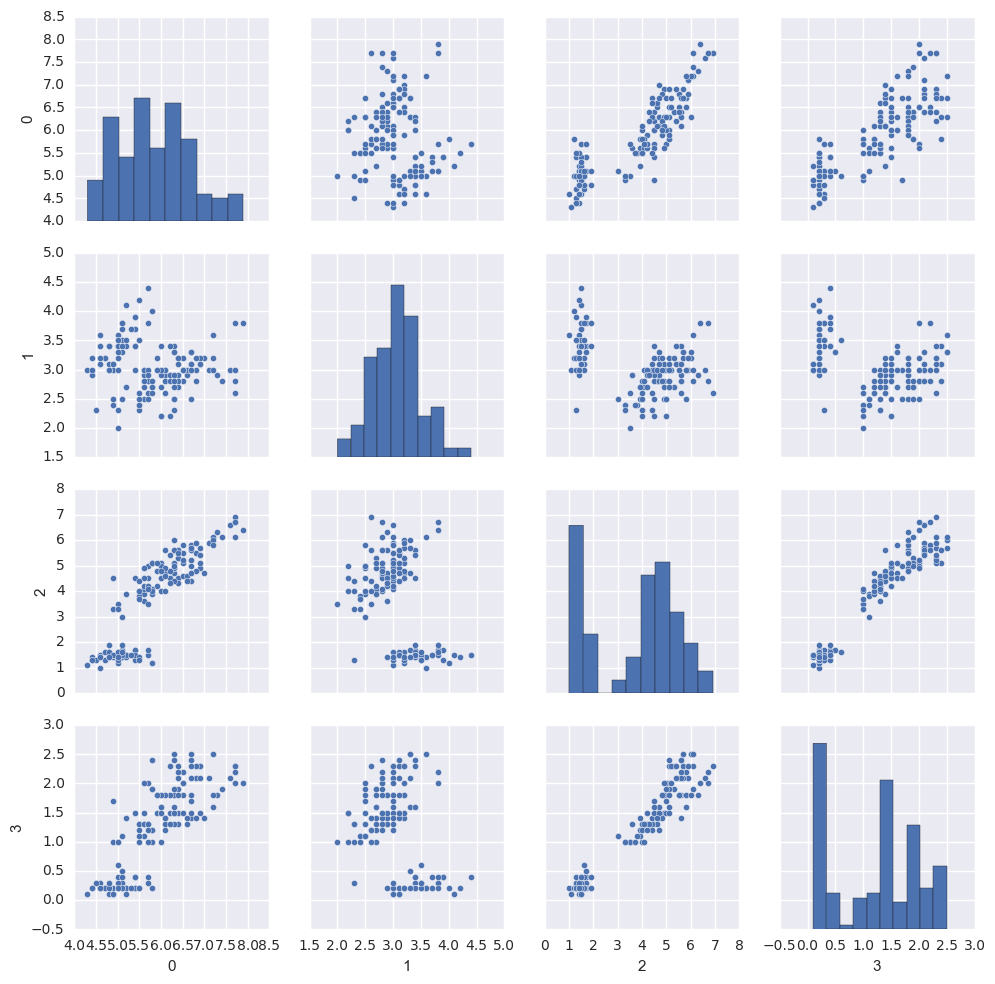

In [13]:
# same as below
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(x_df, alpha=0.2)

sns.pairplot(x_df)

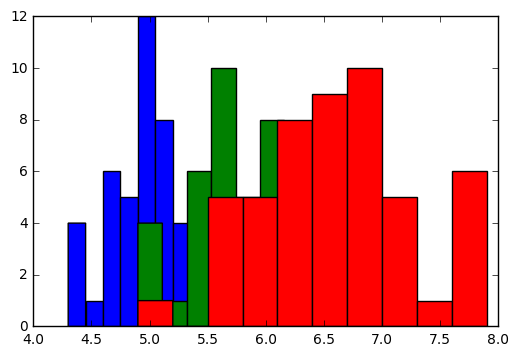

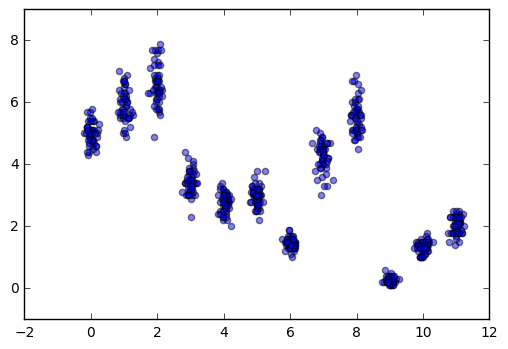

In [7]:
unique, counts = np.unique(y, return_counts=True)
#plt.pie(counts)

#for j in range(4):
plt.figure(1)
for i in unique:
    plt.hist(x[y==i, 0]) # could look at all 4 cols, subplot

plt.figure(2)
for j in range(4):
    for i in unique:
        plt.scatter(y[y==i]+np.random.randn(len(y[y==i]))*.1+(j*3),x[y==i, j], alpha=0.5)   
        # can also use this https://seaborn.pydata.org/tutorial/categorical.html
        


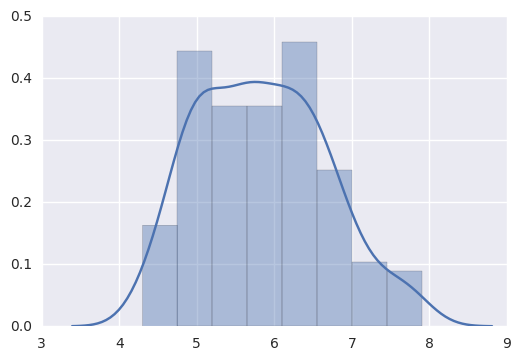

In [10]:
import seaborn as sns

sns.distplot(x[:,0])

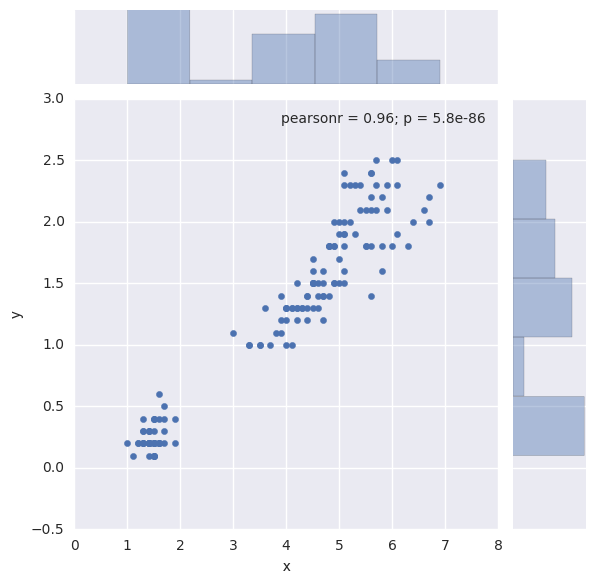

In [22]:
# for correlations

df = pd.DataFrame(x[:,2:4], columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df)

In [30]:
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(X)

pca = PCA()
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[ 0.83849224  0.54491354]
 [ 0.54491354 -0.83849224]]
[0.99244289 0.00755711]


In [31]:
# now with the iris data

pca = PCA()
pca.fit(x)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
[0.92461621 0.05301557 0.01718514 0.00518309]


The results of the PCA for the iris data show that 1 component captures over 90% of the variance.  2 components get you up to 97.7% of explained variance.  This means that there is correlated information in the data and that we likely will only use 2 features max to do an analysis.

In [24]:
iris_sb.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
iris_sb.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
